# Step 6 Create keywords for whole corpus

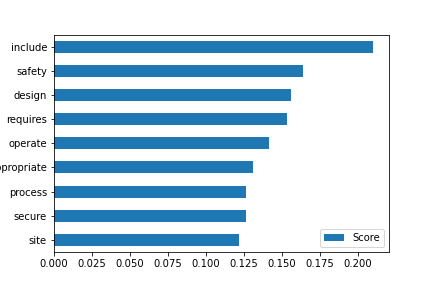

|**[Overview](#Overview)** |**[Installation](#Installation)||**[Prior-steps](#Prior-steps)**|**[How-to-use](#How-to-use)**|**[Next-steps](#Next-steps)**|**[Postscript](#Postscript)**|**[Acknowledgements](#Acknowledgments)|

# Overview
This can be adjusted to allow for number of words returned, and to specify how to treat keywords with similar stems. Here are the ones for the nuclear example.

# Installation

Check installation has been made, as per the [READme](https://github.com/lawrencerowland/Data-Model-for-Project-Frameworks/blob/master/Project-frameworks-by-using-NLP-with-Python-libraries/README.md)

# Prior-steps
Steps 1-4 are optional. 
Step 5 is required. 

# How-to-use

## Import Gensim
The code is provided for the specific modules to be imported

In [1]:
#hide
import gensim
from gensim.summarization import keywords
from gensim.summarization import mz_keywords
import matplotlib as plt
import pandas as pd  
# Note that Smart_open.gcs may not import successfully depending on Gensim set up. This doesnt matter. 

unable to import 'smart_open.gcs', disabling that module


## Open the Interim results folder

In [2]:
#hide
import os
directory= "/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Interim-results/"
# Change directory location for your particular set-up.

with open(os.path.join(directory,'Corpus_as_one_string.txt')) as f:
    Corpus_as_one_string=f.read()
    f.close()

## List showing relative prominence of these words
This is a more complete analysis than just summing the keywords produced in Step 4, due to network effects. 
Here are the results for keywords across all ONR documents. 

Select the number of words required. 
The 'keywords'API uses a TextRank based on PageRank, but complemented with other measures of keyword importance.The API automatically generates word-stems, as can be seen by the results, where clusters of words with the same stems have the same score. e.g. there is requires, required, requirements etc. We drop unwanted synonyms from the results.

In [3]:
Keywords_for_whole_corpus=keywords(Corpus_as_one_string, words=10, scores=True, lemmatize=False, deacc=False)
# Other options are split=False, pos_filter=('NN', 'JJ')

In [4]:
df = pd.DataFrame(Keywords_for_whole_corpus, columns =['Keyword', 'Score']) 

## Select unwanted keywords

In [5]:
#Drop those synonyms we don't want. Enter the row numbers in the list by inspection of the results.
df=df.drop([0,2,3,5,7,8,9,10,11,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30,32,33,35,36,37,38,39,41,42,44,45,46])

In [6]:
df = df[::-1] # reverses the order

In [11]:
# Create interim-results file
df.to_csv(directory+'Keywords_for_whole_corpus.csv', index=False)

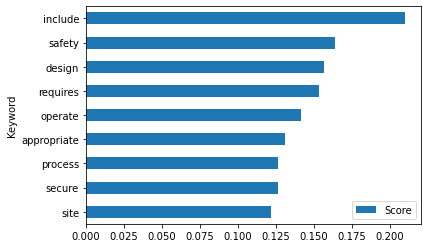

In [7]:
import matplotlib.pyplot as pyplot
figure1=df.plot(kind='barh', x='Keyword', y="Score")
pyplot.savefig(directory+'Keywords-for-whole-library.png') #saves last figure generated

# Next-steps
[Step 7](https://github.com/lawrencerowland/Data-Model-for-Project-Frameworks/blob/master/Project-frameworks-by-using-NLP-with-Python-libraries/Jupyter-notebooks/Step-7-knowledge-graph-from-keywords.ipynb) show how to access the relationships between selected keywords, and show it as a knowledge graph. 

# Postscript: Alternative keyword algorithm
If it is helpful to compare the above results with another approach, then Gensim also has an API for another algorithm

In [59]:
# Montemurro and Zanette’s entropy based keyword extraction algorithm
alternative=mz_keywords(Corpus_as_one_string,split=False,scores=False,weighted=False,threshold="auto")

In [ ]:
print(alternative[0:100])

# Acknowledgments:
[Kite.com](https://kite.com/python/docs/gensim.summarization.mz_keywords) has some useful information on the MZ algorithm. This is below:

'This algorithm looks for keywords that contribute to the structure of the text on scales of `blocksize` words of larger. It is suitable for extracting keywords representing the major themes of long texts.'

Info on parameters:
- blocksize: int, optional: Size of blocks to use in analysis.
- weighted: bool, optional. Whether to weight scores by word frequency. False can useful for shorter texts, and allows automatic thresholding.
- threshold: float or 'auto', optional
- Minimum score for returned keywords,  'auto' calculates the threshold as n_blocks / (n_blocks + 1.0) + 1e-8,
    use 'auto' with `weighted=False`.